In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import platform
platform.architecture()

('64bit', 'WindowsPE')

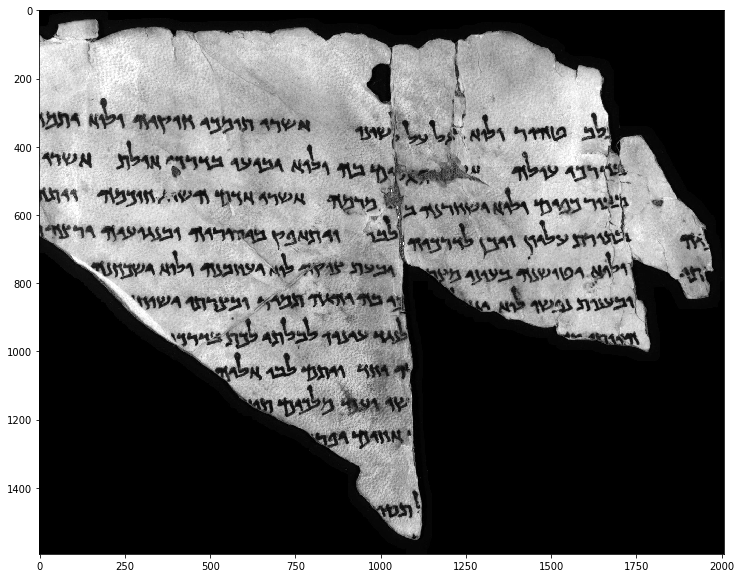

In [2]:
image = cv2.imread('image-output/test15_extracted.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

In [3]:
_, image_bin = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [4]:
image_bin = 255 - image_bin
kernel = np.ones((5,5),np.uint8)
image_bin = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)
image_bin = 255 - image_bin

#image_bin = cv2.medianBlur(image_bin, 3)


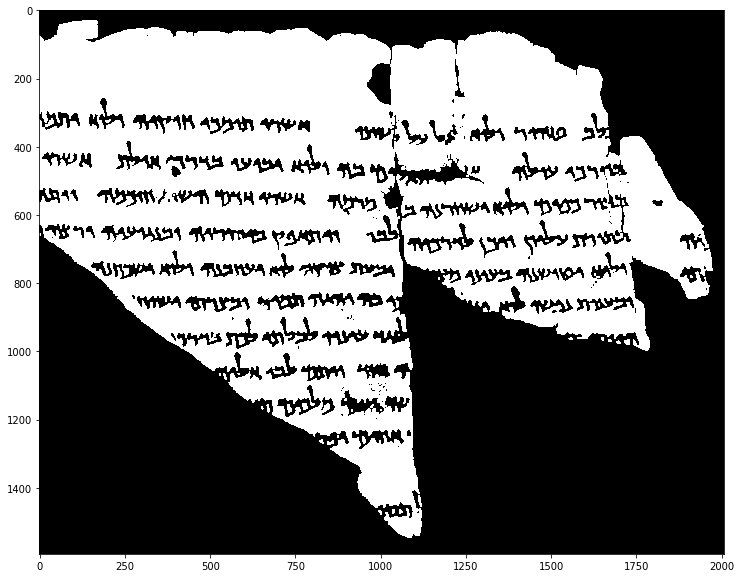

In [5]:
plt.figure(figsize = (500,10))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()

In [6]:
image_bin = 255 - image_bin
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image_bin, 8, cv2.CV_32S)
image_bin = 255 - image_bin
centroids

array([[ 898.33447144,  564.36511578],
       [1114.11049357, 1019.65928083],
       [ 165.5       ,   66.5       ],
       [ 316.66666667,   73.        ],
       [1227.59960552,  211.54832347],
       [ 194.04891882,  313.86635945],
       [1333.        ,  258.        ],
       [1213.06521739,  267.52173913],
       [  58.81051176,  321.12206086],
       [ 996.57586513,  356.22508134],
       [1212.90909091,  307.94545455],
       [1242.90909091,  309.89772727],
       [ 342.53745617,  325.49123366],
       [ 435.14663727,  326.28224917],
       [1058.        ,  306.        ],
       [1308.89651117,  356.56762054],
       [ 553.60737589,  334.07120567],
       [ 699.68861712,  333.87770461],
       [ 777.24279379,  337.86031042],
       [1185.6110515 ,  362.5305794 ],
       [1053.        ,  322.5       ],
       [1098.1335762 ,  364.47298118],
       [1242.        ,  333.5       ],
       [1492.27967146,  359.60246407],
       [1237.23529412,  342.23529412],
       [1411.89642857,  3

In [7]:
n_labels

222

In [8]:
stats

array([[      0,      29,    1975,    1518, 1418435],
       [      0,       0,    2007,    1594, 1582083],
       [    164,      66,       4,       2,       6],
       ...,
       [   1053,    1278,       2,       2,       4],
       [   1108,    1467,       6,       8,      25],
       [   1080,    1540,       3,       2,       3]], dtype=int32)

In [41]:
min_thresh = 400
max_thresh = 3000
boxes = []
box_centroids = []
stats.astype(float)

for i in range(len(stats)):
    if(stats[i][4] >= min_thresh and stats[i][4] <= max_thresh):
        x = stats[i][0]
        y = stats[i][1]
        width = stats[i][2]
        height = stats[i][3]
        print(stats[i])
        print(centroids[i])
        aa = np.concatenate(stats[i], centroids[i])
        print(aa)
        boxes.append(stats[i])
        box_centroids.append(centroids[i])
        cv2.rectangle(image,(x,y),(x + width,y + height),(0,200,0),3)

[1217  141   31  115 1014]
[1227.59960552  211.54832347]


TypeError: only integer scalar arrays can be converted to a scalar index

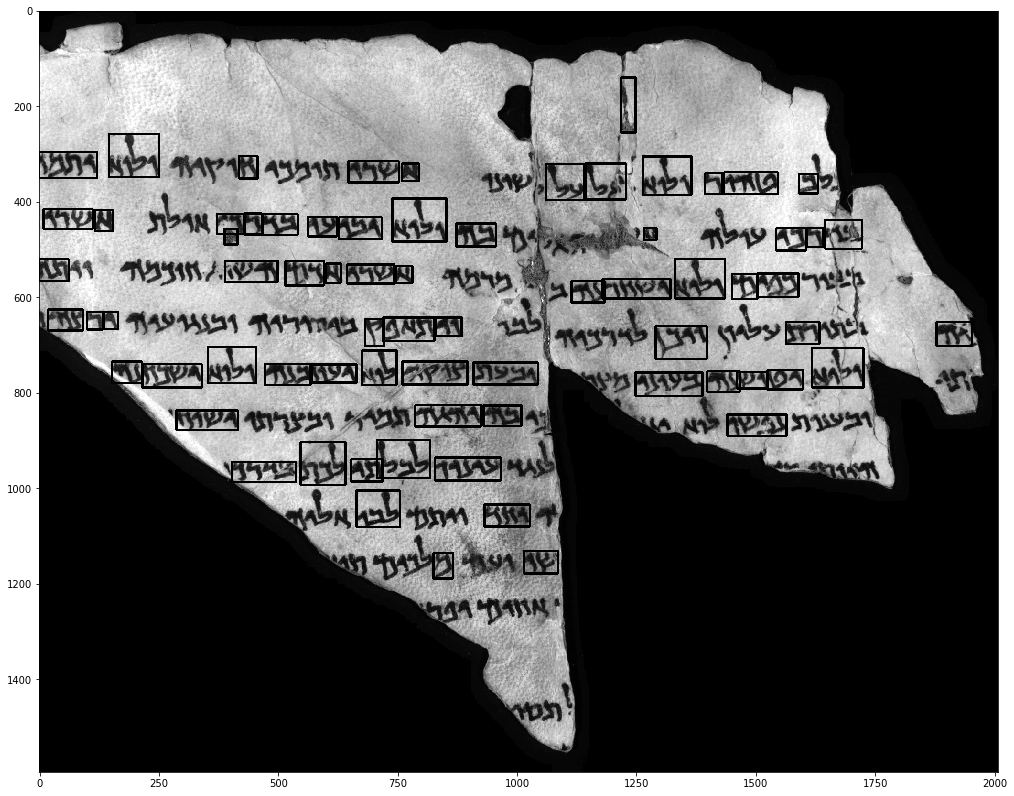

In [34]:
final_image = np.copy(image)
plt.figure(figsize = (500,14))
plt.imshow(final_image, cmap='gray', aspect = 1)
plt.show()

In [35]:
avg_width = 0
avg_height = 0
N = len(boxes)

In [36]:
for box in boxes:
    avg_width += box[2]
    avg_height += box[3]
avg_width /= N
avg_height /= N
avg_height *= 0.6   

ZeroDivisionError: division by zero

In [ ]:
avg_width

In [ ]:
avg_height

In [37]:
word_lines = []
line = []
# add first box to first line
line.append(boxes[0])
word_lines.append(line)
previous_centroid = box_centroids[0][1]
boxes.pop(0)
box_centroids.pop(0)
for i in range(len(boxes)):
    box = boxes[i]
    #check if box belongs to the same line as the previous one: check if centroid of box falls within the range of the previous
    #box
    centroid_y = box_centroids[i][1]
    
    index = 0
    for ind_line in word_lines:
        ind_box = ind_line[0]
        print(ind_box)
        base_centroid = ind_box[5][1]
        print(base_centroid)
        if(centroid_y >= (base_centroid - avg_height) and (base_centroid <= previous_centroid + avg_height)):
            ind_line.append(box)
            word_lines[index] = ind_line
        else:
            #if not, add the line to the collection of lines and start a new one
            line = []
            line.append(box)
            word_lines.append(line)
        index = index + 1
    

IndexError: list index out of range

In [21]:
image = cv2.imread('image-output/test15_extracted.jpg', cv2.IMREAD_GRAYSCALE)
width, height = image.shape
print(len(word_lines))

1


In [17]:
min_height = 99999
max_height = 0

In [18]:
# draw lines for the first strip
for box in word_lines[0]:
    if(box[1] < min_height):
        min_height = box[1]
    elif(box[1] + box[3]  > max_height):
        max_height = box[1] + box[3] 

        
cv2.line(image,(0,min_height),(width, min_height),(0,200,0),3)    
cv2.line(image,(0,max_height),(width, max_height),(0,200,0),3) 
print(min_height)
print(max_height)

141
1189


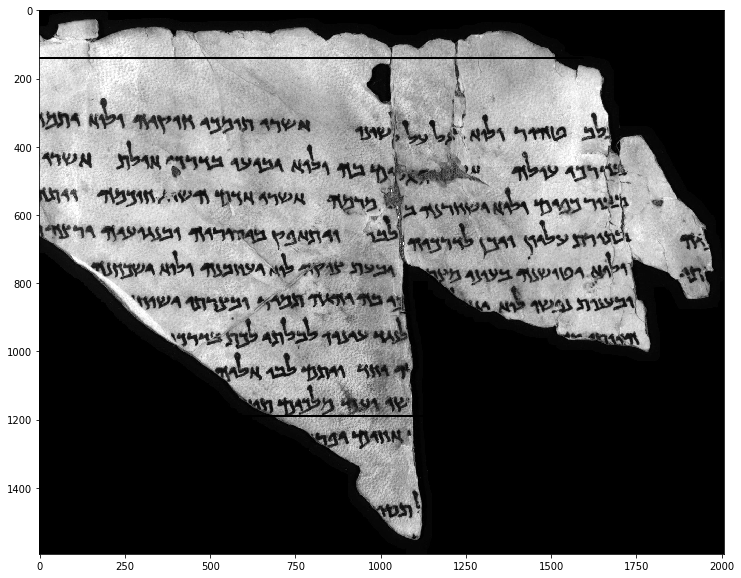

In [19]:
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()